In [1]:
import pandas as pd
import numpy as np
import warnings 

warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./data/gapminder.tsv', sep='\t')
avg_life_exp_by_year = df.groupby('year').lifeExp.mean()
avg_life_exp_by_year

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [4]:
df.year.unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007])

In [8]:
y1952 = df.loc[df.year==1952, :]
y1952.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
12,Albania,Europe,1952,55.230,1282697,1601.056136
24,Algeria,Africa,1952,43.077,9279525,2449.008185
36,Angola,Africa,1952,30.015,4232095,3520.610273
48,Argentina,Americas,1952,62.485,17876956,5911.315053


In [9]:
y1952.lifeExp.mean()

49.05761971830987

In [11]:
continent_describe = df.groupby('continent').lifeExp.describe()
continent_describe.head()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
Africa,624.0,48.865330,9.150210,23.599,42.37250,47.7920,54.41150,76.442
Americas,300.0,64.658737,9.345088,37.579,58.41000,67.0480,71.69950,80.653
Asia,396.0,60.064903,11.864532,28.801,51.42625,61.7915,69.50525,82.603
Europe,360.0,71.903686,5.433178,43.585,69.57000,72.2410,75.45050,81.757
Oceania,24.0,74.326208,3.795611,69.120,71.20500,73.6650,77.55250,81.235


In [12]:
cont_le_agg = df.groupby('continent').lifeExp.agg(np.mean)

In [13]:
cont_le_agg

continent
Africa      48.865330
Americas    64.658737
Asia        60.064903
Europe      71.903686
Oceania     74.326208
Name: lifeExp, dtype: float64

In [14]:
cont_le_agg2 = df.groupby('continent').lifeExp.aggregate(np.mean)
cont_le_agg2

continent
Africa      48.865330
Americas    64.658737
Asia        60.064903
Europe      71.903686
Oceania     74.326208
Name: lifeExp, dtype: float64

In [15]:
def my_mean(values):
    n = len(values)
    sum = 0 
    for value in values:
        sum += value
    return (sum/n)

In [16]:
agg_my_mean = df.groupby('year').lifeExp.agg(my_mean)
agg_my_mean

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [20]:
def my_mean_diff(values, diff_value):
    n = len(values)
    sum = 0 
    for value in values:
        sum += value
    mean = sum / n
    return (mean - diff_value)


In [18]:
global_mean = df.lifeExp.mean()



In [21]:
agg_mean_diff = df.groupby('year').lifeExp.agg(my_mean_diff, diff_value=global_mean)
agg_mean_diff.head()

year
1952   -10.416820
1957    -7.967038
1962    -5.865190
1967    -3.796150
1972    -1.827053
Name: lifeExp, dtype: float64

In [22]:

gdf = df.groupby('year').lifeExp.agg([np.count_nonzero, np.mean, np.std])
gdf.head()

,count_nonzero,mean,std
year,,,
1952,142.0,49.057620,12.225956
1957,142.0,51.507401,12.231286
1962,142.0,53.609249,12.097245
1967,142.0,55.678290,11.718858
1972,142.0,57.647386,11.381953


In [23]:
# use the dic in agg 
gdf_dict = df.groupby('year').agg({
    'lifeExp': 'mean',
    'pop': 'median',
    'gdpPercap': 'median'
})
gdf_dict.head()

,lifeExp,pop,gdpPercap
year,,,
1952,49.057620,3943953.0,1968.528344
1957,51.507401,4282942.0,2173.220291
1962,53.609249,4686039.5,2335.439533
1967,55.678290,5170175.5,2678.334741
1972,57.647386,5877996.5,3339.129407


In [24]:
gdf = df.groupby('year')['lifeExp'].agg(
    [np.count_nonzero, np.mean, np.std]).rename(
    columns={
        'count_nonzero': 'count',
        'mean': 'avg',
        'std': 'std_dev'
    }
)

gdf.head()

,count,avg,std_dev
year,,,
1952,142.0,49.057620,12.225956
1957,142.0,51.507401,12.231286
1962,142.0,53.609249,12.097245
1967,142.0,55.678290,11.718858
1972,142.0,57.647386,11.381953


In [27]:
def my_zxcore(x):
    return ((x - x.mean()) / x.std())


In [29]:
transform_z = df.groupby('year').lifeExp.transform(my_zxcore)
transform_z.shape

(1704,)

In [30]:
from scipy.stats import zscore


In [31]:
sp_z_grouped = df.groupby('year').lifeExp.transform(zscore)
zp_z_nogroup = zscore(df.lifeExp)

In [33]:
sp_z_grouped.head()

0   -1.662719
1   -1.737377
2   -1.792867
3   -1.854699
4   -1.900878
Name: lifeExp, dtype: float64

In [34]:
zp_z_nogroup

array([-2.37533395, -2.25677417, -2.1278375 , ..., -0.98080452,
       -1.5089415 , -1.23805834])

In [35]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [37]:
tips_10 = pd.read_csv('./data/tips.csv').sample(10)

In [39]:
tips_10

,total_bill,tip,sex,smoker,day,time,size
12,15.42,1.57,Male,No,Sun,Dinner,2
14,14.83,3.02,Female,No,Sun,Dinner,2
149,7.51,2.00,Male,No,Thur,Lunch,2
43,9.68,1.32,Male,No,Sun,Dinner,2
197,43.11,5.00,Female,Yes,Thur,Lunch,4
84,15.98,2.03,Male,No,Thur,Lunch,2
166,20.76,2.24,Male,No,Sun,Dinner,2
29,19.65,3.00,Female,No,Sat,Dinner,2
76,17.92,3.08,Male,Yes,Sat,Dinner,2
78,22.76,3.00,Male,No,Thur,Lunch,2


In [41]:
tips_10.loc[np.random.permutation(tips_10.index)[:4], 'total_bill'] = np.NaN
tips_10

,total_bill,tip,sex,smoker,day,time,size
12,NaN,1.57,Male,No,Sun,Dinner,2
14,NaN,3.02,Female,No,Sun,Dinner,2
149,NaN,2.00,Male,No,Thur,Lunch,2
43,NaN,1.32,Male,No,Sun,Dinner,2
197,43.11,5.00,Female,Yes,Thur,Lunch,4
84,15.98,2.03,Male,No,Thur,Lunch,2
166,20.76,2.24,Male,No,Sun,Dinner,2
29,19.65,3.00,Female,No,Sat,Dinner,2
76,17.92,3.08,Male,Yes,Sat,Dinner,2
78,22.76,3.00,Male,No,Thur,Lunch,2


In [42]:
count_sex = tips_10.groupby('sex').count()
count_sex

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Female,2,3,3,3,3,3
Male,4,7,7,7,7,7


In [43]:

def fill_na_mean(x):
    avg = x.mean()
    return (x.fillna(avg))


In [47]:
total_bill_group_mean = tips_10.groupby('sex').total_bill.transform(fill_na_mean)
tips_10['fill_total_bill'] = total_bill_group_mean
tips_10.head()

,total_bill,tip,sex,smoker,day,time,size,fill_total_bill
12,NaN,1.57,Male,No,Sun,Dinner,2,19.355
14,NaN,3.02,Female,No,Sun,Dinner,2,31.380
149,NaN,2.00,Male,No,Thur,Lunch,2,19.355
43,NaN,1.32,Male,No,Sun,Dinner,2,19.355
197,43.11,5.00,Female,Yes,Thur,Lunch,4,43.110


In [49]:
tips = pd.read_csv('./data/tips.csv')

In [50]:
tips.shape

(244, 7)

In [53]:
tips['size'].value_counts()

2    156
3     38
4     37
5      5
6      4
1      4
Name: size, dtype: int64

In [55]:
tips_filtered = tips.groupby('size').filter(lambda x: x['size'].count() > 30)
tips_filtered[:10]

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [57]:
tips_10_1 = pd.read_csv('./data/tips.csv').sample(10, random_state=42)

In [58]:
tips_10_1

,total_bill,tip,sex,smoker,day,time,size
24,19.82,3.18,Male,No,Sat,Dinner,2
6,8.77,2.00,Male,No,Sun,Dinner,2
153,24.55,2.00,Male,No,Sun,Dinner,4
211,25.89,5.16,Male,Yes,Sat,Dinner,4
198,13.00,2.00,Female,Yes,Thur,Lunch,2
176,17.89,2.00,Male,Yes,Sun,Dinner,2
192,28.44,2.56,Male,Yes,Thur,Lunch,2
124,12.48,2.52,Female,No,Thur,Lunch,2
9,14.78,3.23,Male,No,Sun,Dinner,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2


In [59]:
grouped = tips_10_1.groupby('sex')
grouped

In [60]:
grouped.groups

{'Female': Int64Index([198, 124, 101], dtype='int64'),
 'Male': Int64Index([24, 6, 153, 211, 176, 192, 9], dtype='int64')}

In [61]:
avg_grouped = grouped.mean()

In [62]:
avg_grouped

,total_bill,tip,size
sex,,,
Female,13.62,2.506667,2.000000
Male,20.02,2.875714,2.571429


In [63]:
tips_10_1.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [64]:
female = grouped.get_group('Female')
female

,total_bill,tip,sex,smoker,day,time,size
198,13.00,2.00,Female,Yes,Thur,Lunch,2
124,12.48,2.52,Female,No,Thur,Lunch,2
101,15.38,3.00,Female,Yes,Fri,Dinner,2


In [66]:
for sex_group in grouped:
    print(sex_group)
    print('---')

('Female',      total_bill   tip     sex smoker   day    time  size
198       13.00  2.00  Female    Yes  Thur   Lunch     2
124       12.48  2.52  Female     No  Thur   Lunch     2
101       15.38  3.00  Female    Yes   Fri  Dinner     2)
---
('Male',      total_bill   tip   sex smoker   day    time  size
24        19.82  3.18  Male     No   Sat  Dinner     2
6          8.77  2.00  Male     No   Sun  Dinner     2
153       24.55  2.00  Male     No   Sun  Dinner     4
211       25.89  5.16  Male    Yes   Sat  Dinner     4
176       17.89  2.00  Male    Yes   Sun  Dinner     2
192       28.44  2.56  Male    Yes  Thur   Lunch     2
9         14.78  3.23  Male     No   Sun  Dinner     2)
---


In [69]:
bill_sex_time = tips_10_1.groupby(['sex','time'])
group_avg = bill_sex_time.mean()
group_avg

total_bill       tip      size
sex    time                                  
Female Dinner   15.380000  3.000000  2.000000
       Lunch    12.740000  2.260000  2.000000
Male   Dinner   18.616667  2.928333  2.666667
       Lunch    28.440000  2.560000  2.000000

In [70]:
group_avg.columns

Index(['total_bill', 'tip', 'size'], dtype='object')

In [71]:
group_avg.index

MultiIndex(levels=[['Female', 'Male'], ['Dinner', 'Lunch']],
           codes=[[0, 0, 1, 1], [0, 1, 0, 1]],
           names=['sex', 'time'])

In [72]:
group_method = tips_10.groupby(['sex', 'time']).mean().reset_index()
group_method.head()

,sex,time,total_bill,tip,size,fill_total_bill
0,Female,Dinner,19.65,3.010000,2,25.5150
1,Female,Lunch,43.11,5.000000,4,43.1100
2,Male,Dinner,19.34,2.052500,2,19.3475
3,Male,Lunch,19.37,2.343333,2,19.3650


In [73]:
group_param = tips_10.groupby(['sex', 'time'], as_index=False).mean()
group_param.head()

,sex,time,total_bill,tip,size,fill_total_bill
0,Female,Dinner,19.65,3.010000,2,25.5150
1,Female,Lunch,43.11,5.000000,4,43.1100
2,Male,Dinner,19.34,2.052500,2,19.3475
3,Male,Lunch,19.37,2.343333,2,19.3650


In [77]:
intv_df = pd.read_csv('./data/epi_sim.txt')
intv_df.head()

,ig_type,intervened,pid,rep,sid,tr
0,3,40,294524448,1,201,0.000135
1,3,40,294571037,1,201,0.000135
2,3,40,290699504,1,201,0.000135
3,3,40,288354895,1,201,0.000135
4,3,40,292271290,1,201,0.000135


In [78]:
intv_df.shape

(9434653, 6)

In [80]:
count_only = intv_df.groupby(['rep', 'intervened', 'tr'])['ig_type'].count()
count_only.head(10)

rep  intervened  tr      
0    8           0.000166    1
     9           0.000152    3
                 0.000166    1
     10          0.000152    1
                 0.000166    1
     12          0.000152    3
                 0.000166    5
     13          0.000152    1
                 0.000166    3
     14          0.000152    3
Name: ig_type, dtype: int64

In [83]:
count_mean = count_only.groupby(level =[0,1,2]).mean()

In [85]:
count_mean.head()

rep  intervened  tr      
0    8           0.000166    1
     9           0.000152    3
                 0.000166    1
     10          0.000152    1
                 0.000166    1
Name: ig_type, dtype: int64

In [89]:
count_mean = intv_df.groupby(['rep', 'intervened', 'tr'])['ig_type'].count().groupby(level=[0,1,2]).mean()
count_mean.head()

rep  intervened  tr      
0    8           0.000166    1
     9           0.000152    3
                 0.000166    1
     10          0.000152    1
                 0.000166    1
Name: ig_type, dtype: int64

In [92]:
import seaborn as sns 
import matplotlib.pyplot as plt

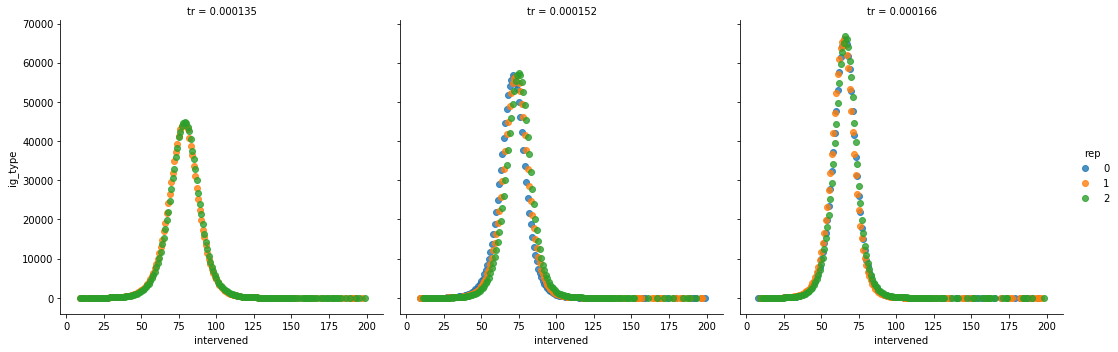

In [93]:
fig = sns.lmplot(x='intervened', y='ig_type', hue='rep', col='tr', fit_reg=False, data=count_mean.reset_index())
plt.show()

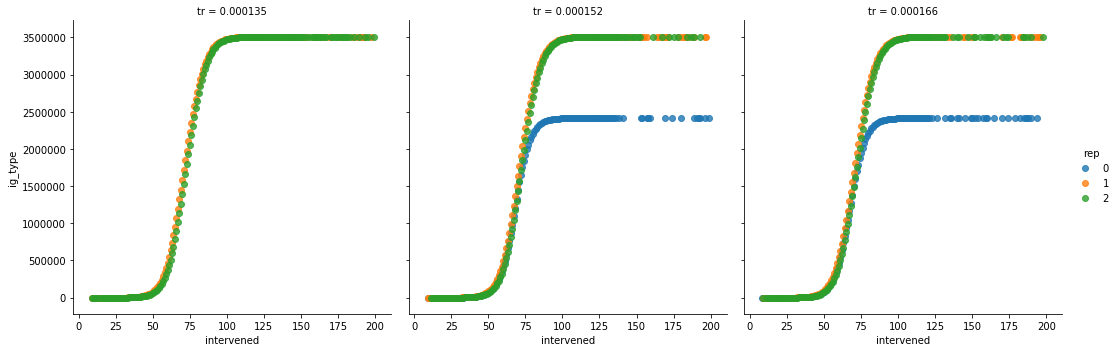

In [95]:
cummulative_count = intv_df.groupby(['rep','intervened', 'tr'])['ig_type'].count().groupby(level=['rep']).cumsum().reset_index()

fig = sns.lmplot(x='intervened', y ='ig_type', hue='rep', col='tr', fit_reg=False, data=cummulative_count)
plt.show()